Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

1. Before we deep down info building this application, let us first understand the dataset. 


In [2]:
coupons_data = pd.read_csv('data/coupons.csv')

In [3]:
# size of our data
coupons_data.shape

(12684, 26)

In [4]:
# first 5 rows of our data
coupons_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# columns in our data and their data types
coupons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
# summary statistics of our data
coupons_data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate missing or problemetic data.

In [7]:
# check for missing values 
coupons_data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

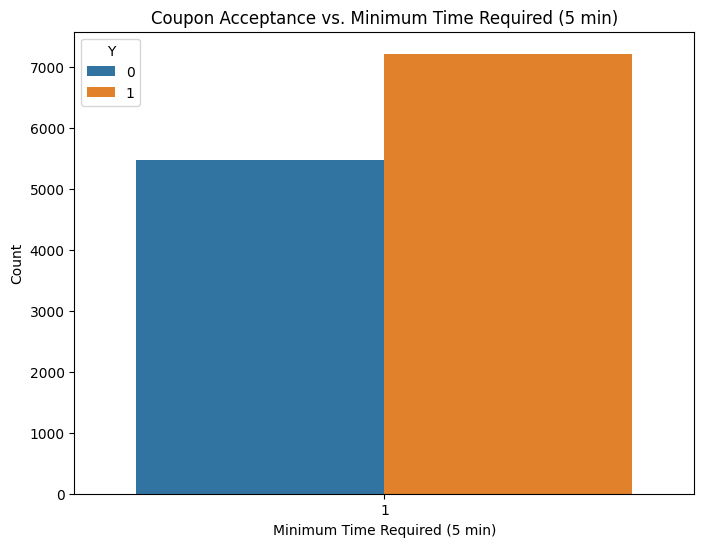

/var/folders/7m/cr40rn2n1dd__njc2p9hqzs00000gn/T/ipykernel_73867/162962806.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rates = coupons_data.groupby(time_col)['Y'].value_counts(normalize=True).unstack()



Acceptance Rates by Minimum Time (5 min):
Y                        0         1
toCoupon_GEQ5min                    
1                 0.431567  0.568433


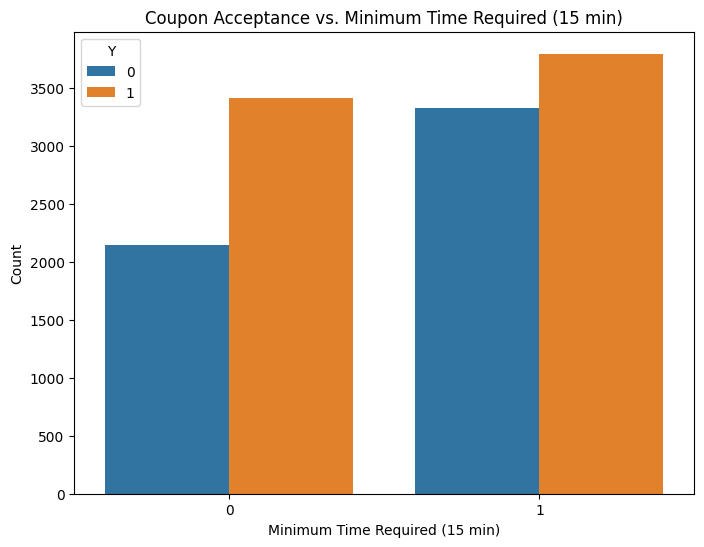

/var/folders/7m/cr40rn2n1dd__njc2p9hqzs00000gn/T/ipykernel_73867/162962806.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rates = coupons_data.groupby(time_col)['Y'].value_counts(normalize=True).unstack()



Acceptance Rates by Minimum Time (15 min):
Y                         0         1
toCoupon_GEQ15min                    
0                  0.385832  0.614168
1                  0.467284  0.532716


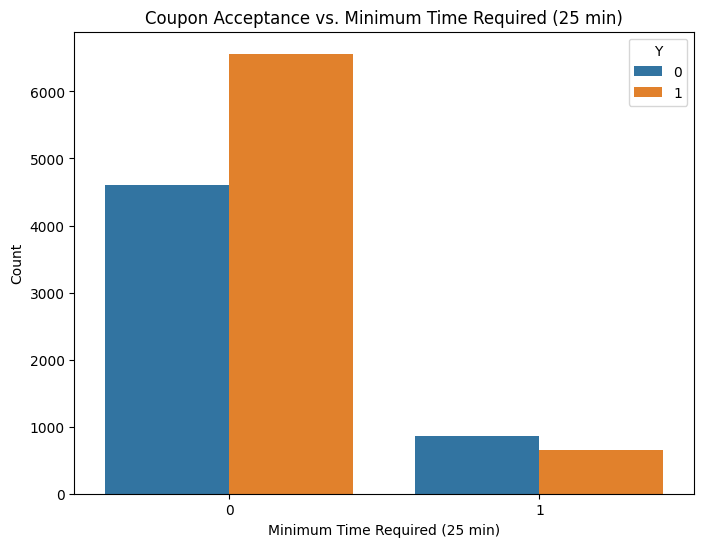


Acceptance Rates by Minimum Time (25 min):
Y                         0         1
toCoupon_GEQ25min                    
0                  0.412691  0.587309
1                  0.571145  0.428855


/var/folders/7m/cr40rn2n1dd__njc2p9hqzs00000gn/T/ipykernel_73867/162962806.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance_rates = coupons_data.groupby(time_col)['Y'].value_counts(normalize=True).unstack()


In [8]:
time_cols = ['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']
for col in time_cols:
    coupons_data[col] = coupons_data[col].astype('category')  # Important!

# Create the visualization (using a loop for all time columns)
for time_col in time_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=time_col, hue='Y', data=coupons_data)
    plt.title(f'Coupon Acceptance vs. Minimum Time Required ({time_col[12:-3]} min)')  # Dynamic title
    plt.xlabel(f'Minimum Time Required ({time_col[12:-3]} min)')
    plt.ylabel('Count')
    plt.show()

    # Calculate and display acceptance rates (optional, but very helpful)
    acceptance_rates = coupons_data.groupby(time_col)['Y'].value_counts(normalize=True).unstack()
    print(f"\nAcceptance Rates by Minimum Time ({time_col[12:-3]} min):")
    print(acceptance_rates)

* From the dataset, following are the missing values and their count.
```python
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
```

Let's analyze in the next step what data can be removed and what values can be replaced.

#### 3. Decide what to do about your missing data.

##### Handling Missing Values

The 'car' column has an extremely high percentage of missing values (approximately 99%). This makes it unsuitable for analysis. Imputing such a large proportion of the data would be unreliable and could significantly bias our results. Therefore, the 'car' column was removed from the dataset.

The remaining columns with missing values ('Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50') had a relatively small number of missing values. For these categorical features, missing values were replaced with the mode (most frequent) category in each respective column. This approach was chosen to preserve the overall distribution of categories and avoid introducing new or random data.

In [9]:
# Impute Missing Values (Mode Imputation)

# update the missing values with the mode value of that column.
cols_to_impute = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in cols_to_impute:
    mode_value = coupons_data[col].mode()[0]
    coupons_data[col] = coupons_data[col].fillna(mode_value)

# remove the car column
coupons_data = coupons_data.drop('car', axis=1)

In [10]:
# check for missing values to confirm that they have been imputed
coupons_data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon.

Proportion of accepted coupons: 0.5684326710816777%

Proportion of accepted vs rejected coupons:
Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


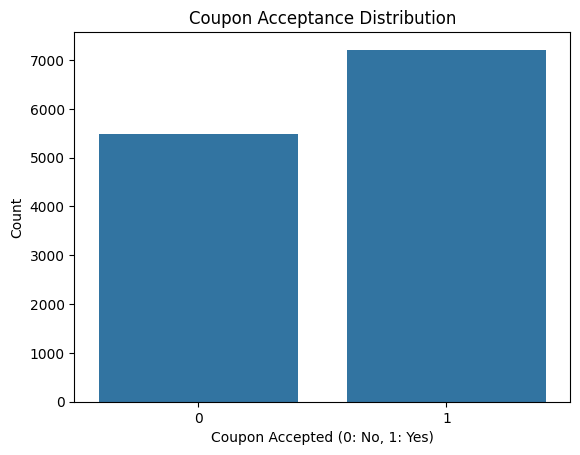

In [11]:
proportion_accepted = coupons_data['Y'].value_counts(normalize=True)[1]  # Access the proportion of Y=1
print(f"Proportion of accepted coupons: {proportion_accepted}%")

print("\nProportion of accepted vs rejected coupons:")
print(coupons_data['Y'].value_counts(normalize=True))
# let us also understand the same with a simple bar chart
sns.countplot(x='Y', data=coupons_data)
plt.title('Coupon Acceptance Distribution')
plt.xlabel('Coupon Accepted (0: No, 1: Yes)')
plt.ylabel('Count')
plt.savefig('images/coupon_acceptance_distribution.png')

5. Use a bar plot to visualize the `coupon` column.

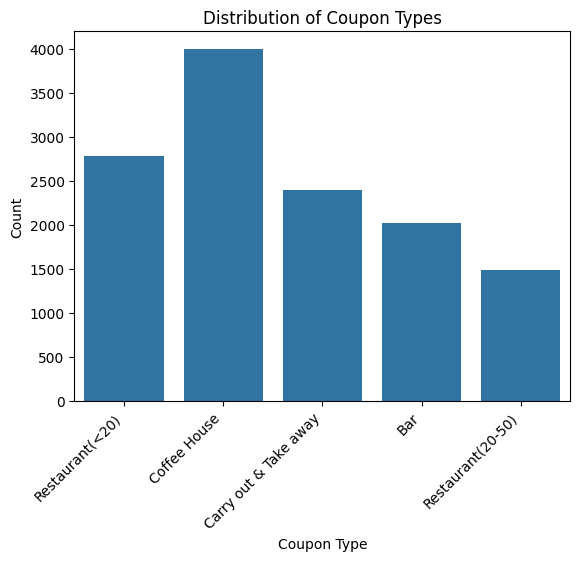

In [12]:
# Distribution of Coupon Types
sns.countplot(x='coupon', data=coupons_data)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.savefig('images/coupon_types_distribution.png')


6. Use a histogram to visualize the temperature column.

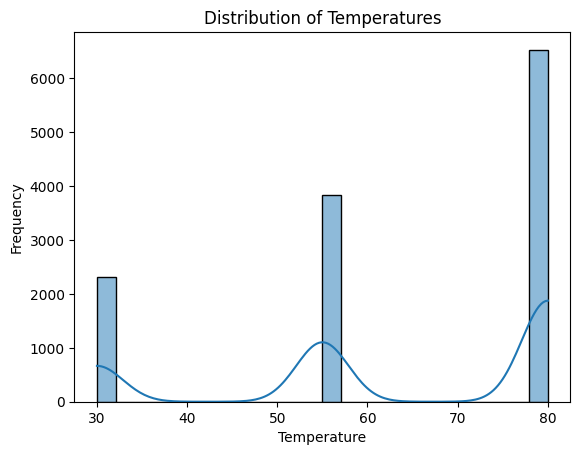

In [13]:
# Distribution of Temperatures (Histogram) with KDE
sns.histplot(coupons_data['temperature'], kde=True)  
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('images/temperature_distribution.png')

 #### Let's understand a few combinations of coupon acceptance vs other features such as temp, weather 

Text(0, 0.5, 'Count')

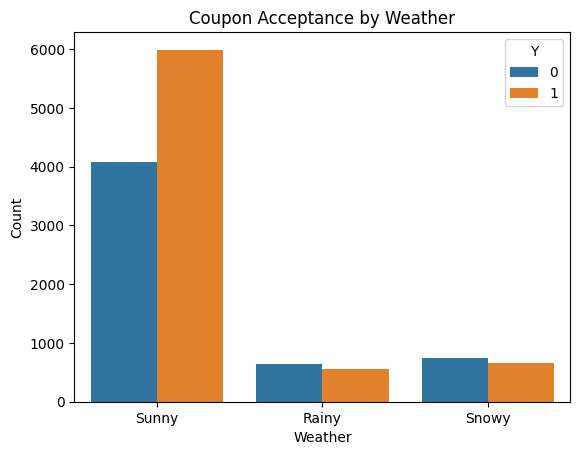

In [14]:
sns.countplot(x='weather', hue='Y', data=coupons_data) # Grouped bar plot
plt.title('Coupon Acceptance by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

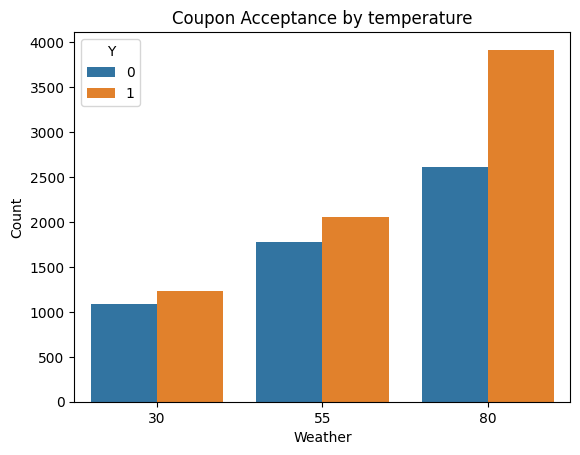

In [15]:
# Example: Acceptance vs. Weather

sns.countplot(x='temperature', hue='Y', data=coupons_data) # Grouped bar plot
# OR
# coupons_data.groupby('weather')['Y'].value_counts().unstack().plot(kind='bar', stacked=True) # Stacked bar plot
plt.title('Coupon Acceptance by temperature')
plt.xlabel('Weather')
plt.ylabel('Count')

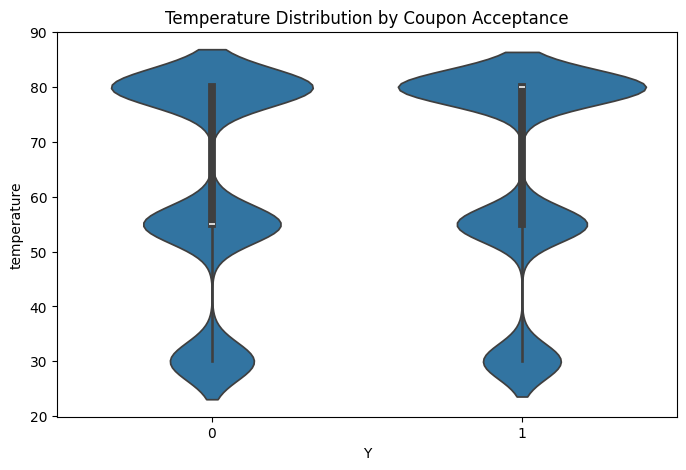

In [16]:
# let us understand the distribution of temperature by coupon acceptance using a violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='Y', y='temperature', data=coupons_data)
plt.title('Temperature Distribution by Coupon Acceptance')
plt.show()

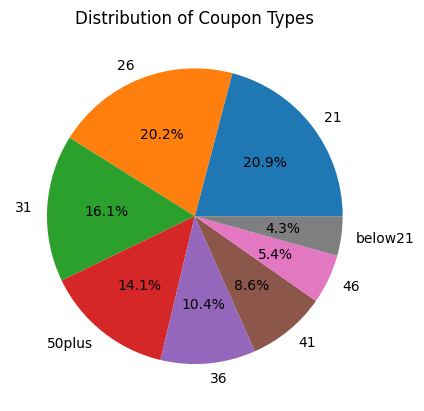

In [17]:
coupons_data['age'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Coupon Types')
plt.ylabel('')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
bar_coupons = coupons_data[coupons_data['coupon'] == 'Bar']
bar_coupons.shape

(2017, 25)

2. What proportion of bar coupons were accepted?


Proportion of accepted bar coupons: 0.41001487357461575

Proportion of accepted and rejected bar coupons:
Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64


Text(0, 0.5, 'Count')

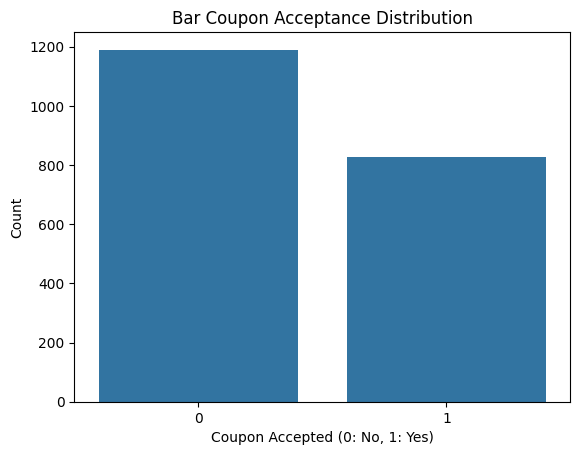

In [19]:
proportion_bar_accepted = bar_coupons['Y'].value_counts(normalize=True)[1]

print(f"Proportion of accepted bar coupons: {proportion_bar_accepted}")

# Optional: Display the proportions of both accepted and rejected bar coupons
print("\nProportion of accepted and rejected bar coupons:")
print(bar_coupons['Y'].value_counts(normalize=True))

# Optional: Visualize the proportions
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Y', data=bar_coupons)
plt.title('Bar Coupon Acceptance Distribution')
plt.xlabel('Coupon Accepted (0: No, 1: Yes)')
plt.ylabel('Count')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance Rates by Bar Visit Category (Percentages):
Y                            0          1
bar_visits_category                      
3 or fewer times     35.264484  64.735516
More than 3 times    64.814815  35.185185


Text(0, 0.5, 'Proportion')

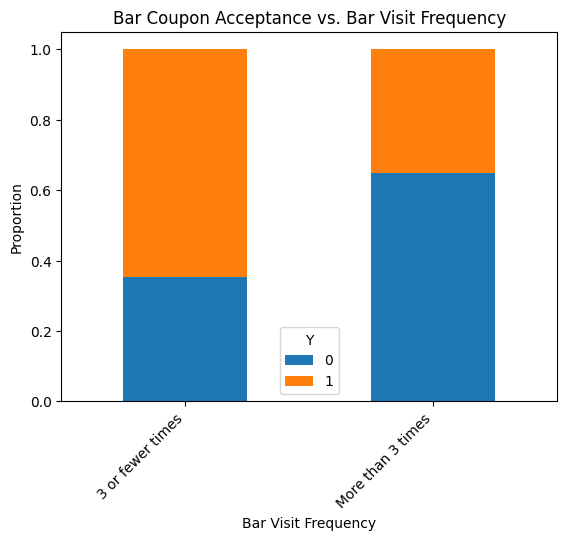

In [25]:
def categorize_bar_visits(bar_visit):
    if bar_visit in ['Never', 'Less1', '1~3']:
        return '3 or fewer times'
    else:
        return 'More than 3 times'

bar_coupons.loc[:, 'bar_visits_category'] = bar_coupons['Bar'].apply(categorize_bar_visits)

# Calculate acceptance rates for each category
acceptance_rates_bar_visits = bar_coupons.groupby('bar_visits_category')['Y'].value_counts(normalize=True).unstack()

# Convert proportions to percentages
acceptance_rates_percentages = acceptance_rates_bar_visits * 100

print("\nAcceptance Rates by Bar Visit Category (Percentages):")
print(acceptance_rates_percentages)

# let us also create a plot for visualization
bar_coupons.groupby('bar_visits_category')['Y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Bar Coupon Acceptance vs. Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Proportion')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?



Acceptance Rates by Driver Category (Percentages):
Y                               0          1
driver_category                             
All others              66.499687  33.500313
Over 25, Bar > 1/month  30.476190  69.523810


Text(0, 0.5, 'Proportion')

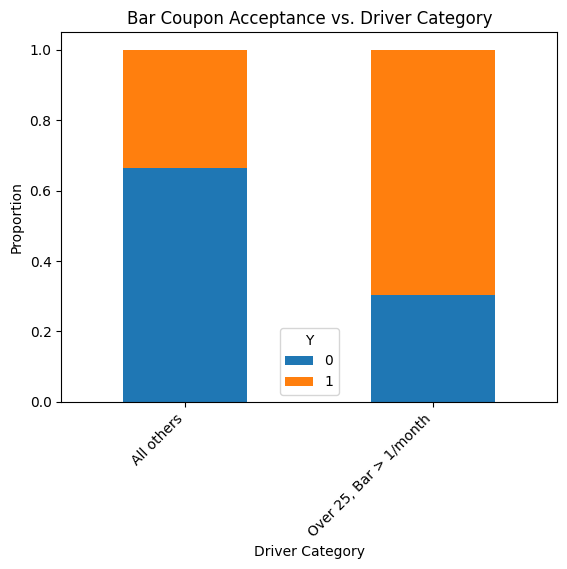

In [24]:
def categorize_drivers(row):
    age = row['age']
    bar_visit = row['Bar']

    if age in ['26', '31', '36', '41', '46', '50plus'] and bar_visit in ['1~3', '4~8', 'gt8']:
        return 'Over 25, Bar > 1/month'
    else:
        return 'All others'

bar_coupons.loc[:, 'driver_category'] = bar_coupons.apply(categorize_drivers, axis=1)

# Calculate acceptance rates for each category
acceptance_rates_drivers = bar_coupons.groupby('driver_category')['Y'].value_counts(normalize=True).unstack()

# Convert proportions to percentages
acceptance_rates_drivers_percentages = acceptance_rates_drivers * 100

print("\nAcceptance Rates by Driver Category (Percentages):")
print(acceptance_rates_drivers_percentages)

# Visualize the acceptance rates
bar_coupons.groupby('driver_category')['Y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Bar Coupon Acceptance vs. Driver Category')
plt.xlabel('Driver Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.



Acceptance Rates by Complex Driver Category (Percentages):
Y                                                 0          1
driver_category_complex                                       
All others                                70.395634  29.604366
Bar > 1/month, No Kids, Other Occupation  28.675136  71.324864


Text(0, 0.5, 'Proportion')

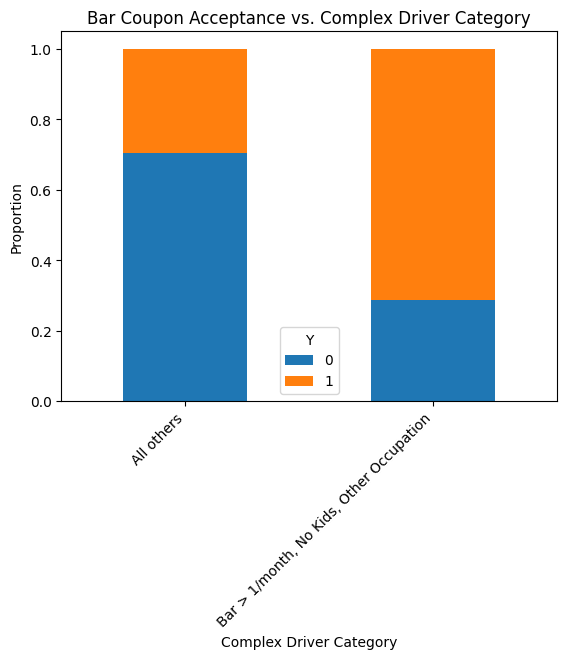

In [23]:
def categorize_drivers_complex(row):
    bar_visit = row['Bar']
    passenger = row['passanger']
    occupation = row['occupation']

    if (bar_visit in ['1~3', '4~8', 'gt8']) and (passenger != 'Kid(s)') and (occupation not in ['Farming Fishing & Forestry']):
        return 'Bar > 1/month, No Kids, Other Occupation'
    else:
        return 'All others'

bar_coupons.loc[:, 'driver_category_complex'] = bar_coupons.apply(categorize_drivers_complex, axis=1)

acceptance_rates_drivers_complex = bar_coupons.groupby('driver_category_complex')['Y'].value_counts(normalize=True).unstack()


acceptance_rates_drivers_complex_percentages = acceptance_rates_drivers_complex * 100
print("\nAcceptance Rates by Complex Driver Category (Percentages):")
print(acceptance_rates_drivers_complex_percentages)

bar_coupons.groupby('driver_category_complex')['Y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Bar Coupon Acceptance vs. Complex Driver Category')
plt.xlabel('Complex Driver Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proportion')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.




Acceptance Rates by Multiple Driver Category (Percentages):
Y                                 0          1
driver_category_multiple                      
All others                70.356037  29.643963
Meets Any Condition       38.758621  61.241379


Text(0, 0.5, 'Count')

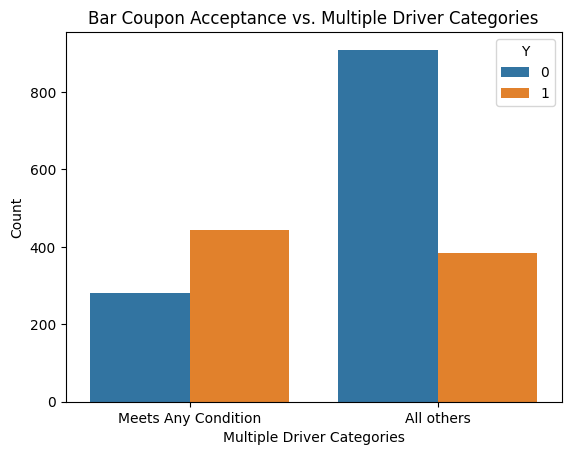

In [ ]:
def categorize_drivers_multiple_conditions(row):
    bar_visit = row['Bar']
    passenger = row['passanger']
    marital_status = row['maritalStatus']
    age = row['age']
    restaurant_cheap = row['RestaurantLessThan20']
    income = row['income']

    condition1 = (bar_visit in ['1~3', '4~8', 'gt8']) and (passenger != 'Kid(s)') and (marital_status != 'Widowed')
    condition2 = (bar_visit in ['1~3', '4~8', 'gt8']) and (age in ['below21', '21', '26'])
    condition3 = (restaurant_cheap in ['4~8', 'gt8']) and (income in ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])

    if condition1 or condition2 or condition3:
        return 'Meets Any Condition'
    else:
        return 'All others'

bar_coupons.loc[:, 'driver_category_multiple'] = bar_coupons.apply(categorize_drivers_multiple_conditions, axis=1)

acceptance_rates_drivers_multiple = bar_coupons.groupby('driver_category_multiple')['Y'].value_counts(normalize=True).unstack()
acceptance_rates_drivers_multiple_percentages = acceptance_rates_drivers_multiple * 100

print("\nAcceptance Rates by Multiple Driver Category (Percentages):")
print(acceptance_rates_drivers_multiple_percentages)

#this time let's try a count plot.
sns.countplot(x='driver_category_multiple', hue='Y', data=bar_coupons)
plt.title('Bar Coupon Acceptance vs. Multiple Driver Categories')
plt.xlabel('Multiple Driver Categories')
plt.ylabel('Count')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

based on this analysis, I could come up with the following hypothesize.

#### 1. Frequency of Bar Visits:
Drivers who visit bars more frequently (more than once a month) are significantly more likely to accept bar coupons. This suggests a direct correlation between regular bar patronage and coupon acceptance.

#### 2. Life Stage and Lifestyle:

Drivers without children present (passengers not a kid) are more likely to accept bar coupons. This implies that individuals with more freedom and potentially more disposable income for social activities are more receptive.

 Drivers not widowed are more likely to accept coupons. This may imply that drivers who are single, or in non-widowed relationships are more likely to accept coupons.

 Drivers under the age of 30 are more likely to accept bar coupons. This implies that younger individuals are more likely to accept bar coupons.

#### 3. Economic Factors:

Drivers who frequent cheap restaurants (more than 4 times a month) and have lower incomes (less than 50K) are more likely to accept bar coupons. This indicates that price sensitivity and value-seeking behavior play a role in coupon acceptance.

#### 4. Targeted Marketing:

The data suggests that bar coupons are most effective when targeted towards specific demographic and behavioral profiles:
Frequent bar-goers.
Individuals without children.
Younger individuals.
Individuals who are price sensitive.
Coupon Relevance:

The bar coupons are more relevant to people who have the lifestyle that entails going to bars.



### Independent Investigation (part 2) doing analysis for other coupons.

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In this analysis, I am considering CoffeeHouse and will try to come up with a similar analysis.


In [35]:
# coupons_data['coupon'].unique()
coffeehouse_coupons = coupons_data[coupons_data['coupon'] == 'Coffee House']

# Verify
print(f"Number of CoffeeHouse coupons: {len(coffeehouse_coupons)}")
print(coffeehouse_coupons['coupon'].unique())

Number of CoffeeHouse coupons: 3996
['Coffee House']


In [36]:
acceptance_rate_coffeehouse = coffeehouse_coupons['Y'].value_counts(normalize=True)[1]
print(f"Overall acceptance rate for CoffeeHouse coupons: {acceptance_rate_coffeehouse * 100:.2f}%")

Overall acceptance rate for CoffeeHouse coupons: 49.92%



Acceptance rates by passenger:
Y                 0         1
passanger                    
Alone      0.562057  0.437943
Friend(s)  0.403094  0.596906
Kid(s)     0.516908  0.483092
Partner    0.429508  0.570492

Acceptance rates by time of day:
Y            0         1
time                    
10AM  0.359288  0.640712
10PM  0.575758  0.424242
2PM   0.452141  0.547859
6PM   0.587374  0.412626
7AM   0.554217  0.445783

Acceptance rates by weather:
Y               0         1
weather                    
Rainy    0.477876  0.522124
Snowy    0.567657  0.432343
Sunny    0.496395  0.503605

Acceptance rates by occupation:
Y                               0         1
occupation                                 
Computer & Mathematical  0.496659  0.503341
Management               0.543624  0.456376
Sales & Related          0.608451  0.391549
Student                  0.374749  0.625251
Unemployed               0.457895  0.542105


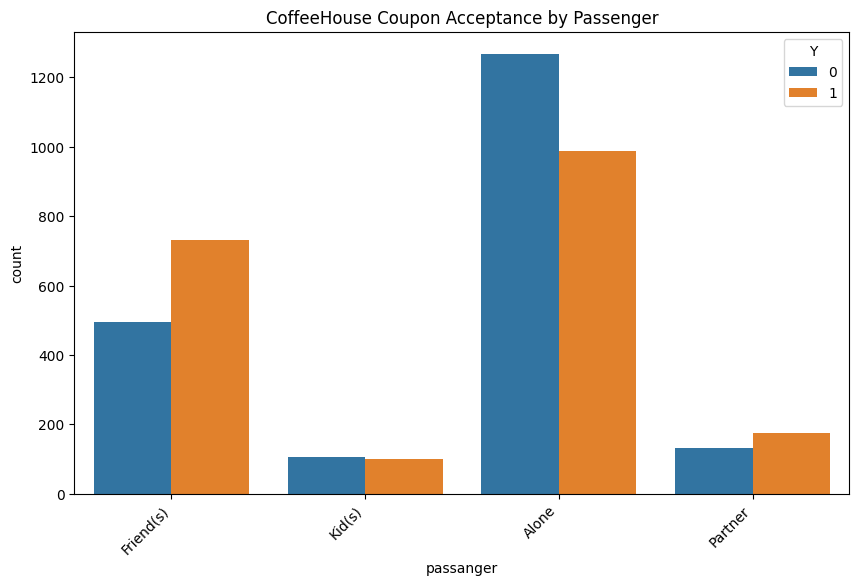

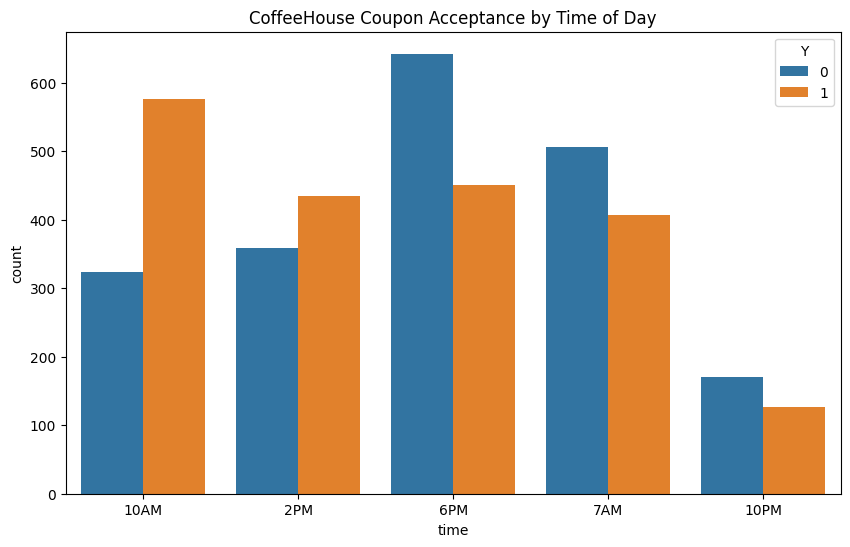

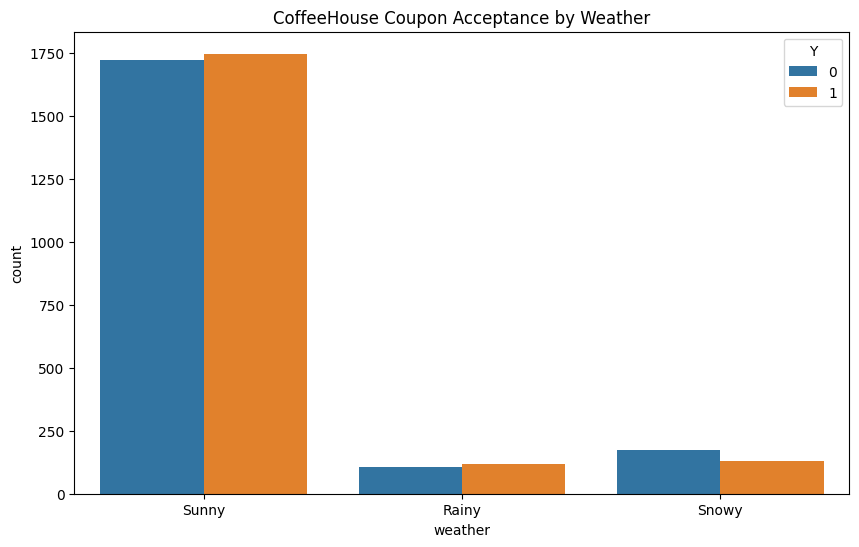

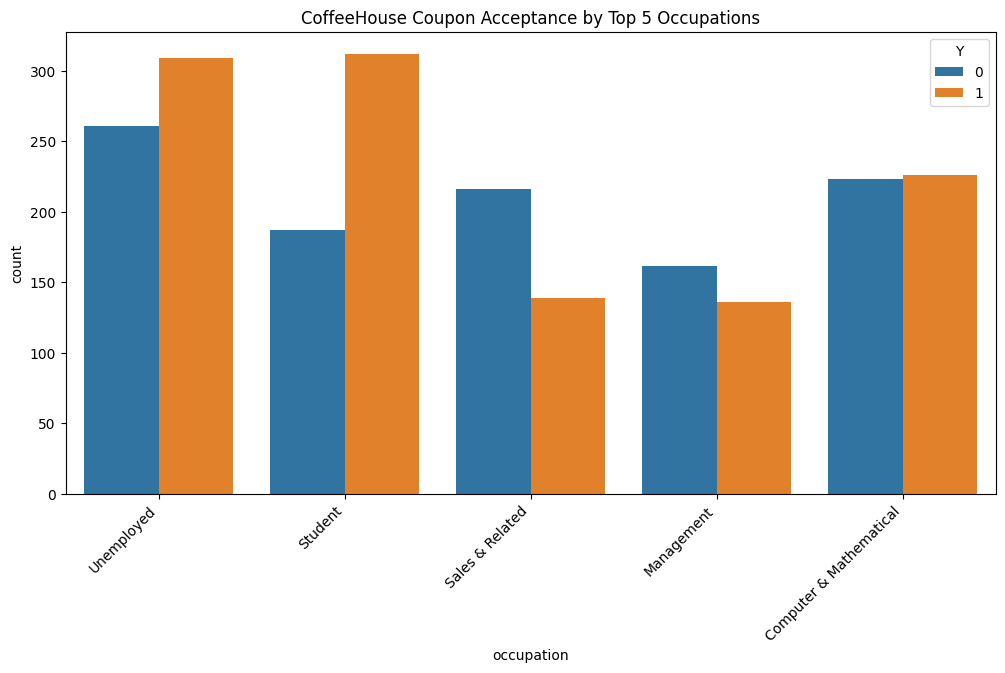

In [43]:
# Passenger vs. Acceptance
plt.figure(figsize=(10, 6))
sns.countplot(x='passanger', hue='Y', data=coffeehouse_coupons)
plt.title('CoffeeHouse Coupon Acceptance by Passenger')
plt.xticks(rotation=45, ha='right')

# Time of Day vs. Acceptance
plt.figure(figsize=(10, 6))
sns.countplot(x='time', hue='Y', data=coffeehouse_coupons)
plt.title('CoffeeHouse Coupon Acceptance by Time of Day')

# Weather vs. Acceptance
plt.figure(figsize=(10, 6))
sns.countplot(x='weather', hue='Y', data=coffeehouse_coupons)
plt.title('CoffeeHouse Coupon Acceptance by Weather')

# Occupation vs. Acceptance (Top 5)
top_occupations = coffeehouse_coupons['occupation'].value_counts().nlargest(5).index
filtered_occupations = coffeehouse_coupons[coffeehouse_coupons['occupation'].isin(top_occupations)]
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='Y', data=filtered_occupations)
plt.title('CoffeeHouse Coupon Acceptance by Top 5 Occupations')
plt.xticks(rotation=45, ha='right')

#Calculate acceptance rates for each of the categories.
print('\nAcceptance rates by passenger:')
print(coffeehouse_coupons.groupby('passanger')['Y'].value_counts(normalize=True).unstack())
print('\nAcceptance rates by time of day:')
print(coffeehouse_coupons.groupby('time')['Y'].value_counts(normalize=True).unstack())
print('\nAcceptance rates by weather:')
print(coffeehouse_coupons.groupby('weather')['Y'].value_counts(normalize=True).unstack())
print('\nAcceptance rates by occupation:')
print(filtered_occupations.groupby('occupation')['Y'].value_counts(normalize=True).unstack())

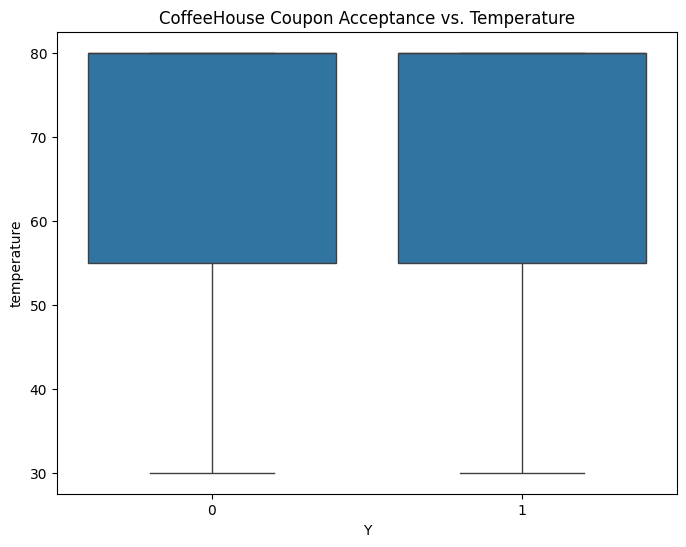

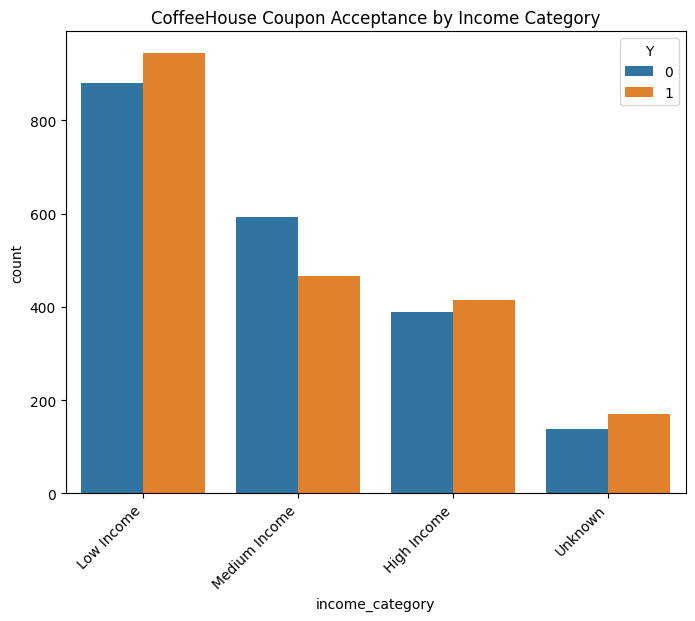


Acceptance rates by income category:
Y                       0         1
income_category                    
High Income      0.484472  0.515528
Low Income       0.482456  0.517544
Medium Income    0.559962  0.440038
Unknown          0.448052  0.551948


In [45]:
# Temperature vs. Acceptance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Y', y='temperature', data=coffeehouse_coupons)
plt.title('CoffeeHouse Coupon Acceptance vs. Temperature')
plt.show()

# Income vs. Acceptance (Using a simplified income category)
def simplify_income(income):
    if income in ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999']:
        return 'Low Income'
    elif income in ['$50000 - $62499', '$62500 - $74999', '$75000 - $87499']:
        return 'Medium Income'
    elif income in ['$87500 - $99999', '$100000 or More']:
        return 'High Income'
    else:
        return 'Unknown'
coffeehouse_coupons.loc[:,'income_category'] = coffeehouse_coupons['income'].apply(simplify_income)

plt.figure(figsize=(8, 6))
sns.countplot(x='income_category', hue='Y', data=coffeehouse_coupons)
plt.title('CoffeeHouse Coupon Acceptance by Income Category')
plt.xticks(rotation=45, ha='right')
plt.show()
print('\nAcceptance rates by income category:')
print(coffeehouse_coupons.groupby('income_category')['Y'].value_counts(normalize=True).unstack())

Hypotheses Based on Observations:

> Passenger:
People traveling alone or with a partner are more likely to accept CoffeeHouse coupons.

> Time of Day:
Afternoon and evening hours show a higher acceptance rate, possibly indicating coffee runs after lunch or after work.

> Weather:
Sunny weather appears to correlate with higher acceptance rates.

> Occupation:
Students and those in management occupations show a higher acceptance rate.

> Temperature:
Higher temperatures seem to correlate with slightly higher acceptance.

> Income:
Medium income people are more likely to accept coffeehouse coupons.